## 问答题
1. 支持向量机的基本思想是什么？

2. 什么是支持向量？

3. 在使用 SVM 时，缩放输入值为什么很重要？

4. SVM 分类器在对实例进行分类时能输出置信度分数吗？概率呢？

5. 你如何在 LinearSVC、SVC 和 SGDClassifier 之间进行选择？

6. 假设你已经使用 RBF 核训练了一个 SVM 分类器，但它似乎欠拟合训练集。
   你应该增大还是减小 γ（gamma）？C 呢？

7. ε 不敏感模型是什么意思？

8. 使用核技巧有什么意义？

## 编程题
1. 在葡萄酒数据集上训练SVM分类器，可以使用sklearn.datasets.load_wine()加载它。该数据集包含3个不同种植者生产的178个葡萄酒样本的化学分析：目标是训练一个分类模型，该模型能够根据葡萄酒的化学分析预测种植者。由于SVM分类器是二元分类器，将需要使用“一对全部”对所有三个类进行分类。能达到的精度是多少？

   "一对全部"可以复习 **8_sklearn做分类.ipynb**里的笔记，里面提到了用二元分类器做多分类问题

---

2. 提前预习 **10_支持向量机.ipynb** 最新更新的笔记 （把SVM分类用梯度下降实现）； 大概理解笔记后，尝试自己对照笔记 实现用梯度下降实现SVM分类

   并把自定义的SVM分类用于 iris data(鸢尾花数据)； 取花瓣长度 和 花瓣宽度特征， 分类 看是不是 分类2的花 （(iris.target == 2)

   对比下sklearn自带的SVM分类 和 自定义SVM分类 实现的分类效果

---

3. 在加州房屋数据集上训练和微调SVM回归器。可以使用原始数据集而不是 在课上使用的调整后的版本，
可以使用sklearn.datasets.fetch_california_housing()加载它。目标代表了数十万美元。
由于有超过20000个实例，SVM可能会很慢，因此对于超参数调整，应该使用更少的实例（例如2000个）来测试更多的超参数组合。最佳模型的RMSE是多少？



## 问答题:

In [20]:
# 1. 支持向量机的基本思想是什么？
# 支持向量机(SVM）背后的基本思想是在类之间构建尽可能宽的”街道”。换句话说，目标是使区分两个类的决策边界与训练实例之间的边距尽可能大。在进行软边距分类时，SVM
# 会在完美区分两个类和尽可能宽的”街道”（即，少数实例最终可能会出现在“街道”上）之间寻找一个折衷方案。另一个关键思想是在非线性数据集上训练时使用核函数。SVM也可以
# 进行调整，以执行线性和非线性回归。
# 关键点：
# 目标是找到一个具有最大几何间隔的分离超平面。
# 对线性不可分数据，通过核技巧（Kernel Trick） 映射到高维空间使其线性可分。
# 通过正则化参数（C） 控制分类错误与间隔宽度的权衡。

# 2. 什么是支持向量？
# 训练完SVM后，支持向量就是位于“街道”上的任何实例，包括其边界。决策边界完全由支持向量决定。任何非支持向量（即不在街道上）的实例都不会对决策边界产生任何影响；
# 可以移除它们、添加更多实例或删除它们，只要它们不在街道上，就不会影响决策边界。使用核化SVM计算预测仅涉及支持向量，而不是整个训练集。
# 特点：
# 位于间隔边界上
# 若删除所有非支持向量，模型结果不变；但删除支持向量会改变超平面。
# 数量通常较少，决定了模型的复杂度。

# 3. 在使用 SVM 时，缩放输入值为什么很重要？
# SVM 对特征尺度敏感，原因包括：
# 1) 目标函数依赖特征内积:SVM 优化依赖于特征向量的点积（如核函数计算），尺度差异大的特征会使模型偏向大尺度特征。
# 2) 间隔的定义基于距离:未缩放时，大范围特征会主导间隔计算，导致模型忽略小范围特征。
# 3) 正则化惩罚的公平性:参数C对所有特征权重施加相同惩罚，尺度不一会导致权重更新不平衡。

# 4. SVM 分类器在对实例进行分类时能输出置信度分数吗？概率呢？
# 可以使用decision_function获取置信度分数，这些分数表示实例与决策边界之间的距离。但是它们不能直接转换为类概率的估计值。如果在创建SVC时设置了probability=True，那么
# 在训练结束时，使用5折交叉验证为训练样本生成作为验证集的分数（训练一个逻辑回归模型，把这些分数映射到估计的概率），之后predict_proba()和predict_log_proba()方法将可
# 用。
# 置信度分数:可通过 decision_function() 获取样本到超平面的符号距离（值越大表示分类置信度越高）。
# 概率估计:使用 predict_proba()（需设置 probability=True）可通过 Platt 缩放（逻辑回归校准）输出概率，但计算开销较大且概率未必精确。

5.你如何在 LinearSVC、SVC 和 SGDClassifier 之间进行选择？
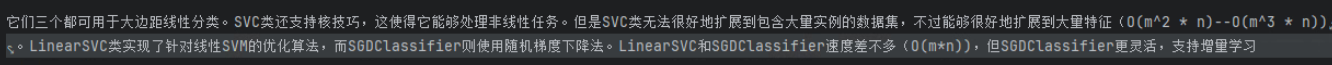


| 分类器           | 	适用场景	                          | 注意事项                |
|---------------|:--------------------------------|:--------------------|
| LinearSVC	    | 线性核、大规模数据（更快），支持稀疏矩阵。	          | 需标准化数据，默认使用 L2 正则化。 |
| SVC	          | 中小规模数据、非线性核（RBF/多项式等），支持概率输出。	  | 训练复杂度较高             |
| SGDClassifier | 	超大规模数据（增量学习），                  | 支持线性SVM或自定义损失函数。	   | 需调参（学习率、迭代次数），结果可能波动。  |


In [21]:
# 6. 假设你已经使用 RBF 核训练了一个 SVM 分类器，但它似乎欠拟合训练集。你应该增大还是减小 γ（gamma）？C 呢？
#增大γ（减小高斯核的带宽），γ 增大使单个样本影响范围变小，决策边界更复杂，解决欠拟合。
# 增大C,C增大降低对误分类的容忍度，使模型更拟合训练数据。

# 7. ε 不敏感模型是什么意思？
# 回归SVM模型会尝试在预测模型的边界范围内（epsilon）拟合尽可能多的实例，训练后，在这个范围内添加实例，模型参数将完全不受影响，这个被叫做epsilon不敏感->回归
# SVM模型的支持向量是边界范围外的实例。目的是解决回归问题（SVR），在预测连续值时存在的微小误差。
# ε 不敏感模型的支持向量:位于容忍带边界或带外的样本点
# 关键参数：
# ϵ（控制容忍度）
# C（控制正则化强度）。
# 优势：抗噪声、解稀疏、避免过拟合，特别适合含噪声的回归任务。

# 8. 使用核技巧有什么意义？
# 核技巧是一种数学技巧，可以训练非线性SVM模型。生成的模型相当于使用非线性变换将输入映射到另一个空间，然后在得到的高纬输入上训练线性SVM，核技巧无需对输入进行任
# 何变换即可获得相同的结果(核技巧允许在原始低维空间中隐式计算高维特征空间的内积，从而避免显式映射的高计算成本)。
# 核心价值:
# 高效解决非线性问题（如 RBF 核映射到无限维）。
# 计算复杂度仅依赖样本数，而非特征维数（避免“维数灾难”）。
# 常见核函数：
# 线性核(linear)、多项式核(poly)、高斯核（RBF）、Sigmoid 核。

## 编程题:

In [22]:
# 1. 在葡萄酒数据集上训练SVM分类器，可以使用sklearn.datasets.load_wine()加载它。该数据集包含3个不同种植者生产的178个葡萄酒样本的化学分析：目标是训练一个分类模型，该模型能够根据葡萄酒的化学分析预测种植者。由于SVM分类器是二元分类器，将需要使用“一对全部”对所有三个类进行分类。能达到的精度是多少？"一对全部"可以复习 **8_sklearn做分类.ipynb**里的笔记，里面提到了用二元分类器做多分类问题

In [31]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

from Python学习记录.八月.ml_learning.homework.HW2.作业2答案 import preprocessing

# 1. 加载数据集
wine = load_wine()
X = wine.data  # 特征数据 (178个样本 x 13个特征)
y = wine.target  # 目标标签 (3个类别)
print(f"特征名: {wine.feature_names}")
print(f"类别名: {wine.target_names}")
print(f"数据形状: {X.shape}, 标签形状: {y.shape}")

# 2. 数据预处理（标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 划分数据集 (70%训练, 30%测试)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# 4. 创建并训练SVM分类器
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # 使用RBF核
svm.fit(X_train, y_train)

# 5. 评估模型
y_pred = svm.predict(X_test)
print("\n模型评估报告:")
print(classification_report(y_test, y_pred))
print(f"测试集准确率: {accuracy_score(y_test, y_pred):.4f}")

# 6. 超参数调优
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# 网格搜索 (耗时操作，小数据集可用)
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\n最佳参数组合:", grid_search.best_params_)
print("调优后准确率:", grid_search.best_score_)

# 使用最佳模型预测
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print(f"调优后测试集准确率: {accuracy_score(y_test, y_pred_best):.4f}")

特征名: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
类别名: ['class_0' 'class_1' 'class_2']
数据形状: (178, 13), 标签形状: (178,)

模型评估报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

测试集准确率: 0.9815

最佳参数组合: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
调优后准确率: 0.9756666666666666
调优后测试集准确率: 0.9815


In [24]:
# 2. 提前预习"10_支持向量机.ipynb"最新更新的笔记（把SVM分类用梯度下降实现）；大概理解笔记后，尝试自己对照笔记实现用梯度下降实现SVM分类并把自定义的SVM分类用于 iris data(鸢尾花数据)；取花瓣长度和花瓣宽度特征，分类看是不是分类2的花（(iris.target == 2)对比下sklearn自带的SVM分类和自定义SVM分类实现的分类效果。

In [44]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C, eta0, n_epochs=1000, random_state=None):
        self.C = C                   # 正则化参数
        self._alpha = 1 / (2*C)      # 正则化系数的倒数
        self.eta0 = eta0             # 初始学习率
        self.n_epochs = n_epochs     # 训练轮数
        self.random_state = random_state  # 随机种子

    @property
    def eta(self):
        return self.eta0

    def fit(self, X, y):
        # 设置随机种子
        if self.random_state:
            np.random.seed(self.random_state)

        # 初始化权重和偏置
        w = np.random.randn(X.shape[1], 1)  # 特征权重
        b = 0                               # 偏置项

        # 转换标签为{-1, 1}
        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1

        self.Js = []  # 存储每轮损失值
        m = X.shape[0]  # 样本数量

        # 梯度下降训练
        for epoch in range(self.n_epochs):
            # 识别支持向量（违反间隔的样本）
            support_vectors_idx = ((X@w + b)*t < 1).ravel()
            X_sv = X[support_vectors_idx]  # 支持向量特征
            t_sv = t[support_vectors_idx]  # 支持向量标签

            # 计算损失函数（Hinge Loss + L2正则化）
            J = (np.sum(w * w) * self._alpha + np.sum(1 - t_sv * (X_sv@w + b))) / m
            self.Js.append(J)

            # 计算梯度
            w_gradient_vector = (2*self._alpha*w - X_sv.T @ t_sv) / m
            b_derivative = -np.sum(t_sv) / m

            # 更新参数
            w = w - self.eta * w_gradient_vector
            b = b - self.eta * b_derivative

        # 保存训练结果
        self.intercept_ = b
        self.coef_ = w
        # 识别最终支持向量
        support_vectors_idx = ((X@w + b)*t < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_) + self.intercept_

    def predict(self, X):
        return self.decision_function(X) >= 0


In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data
y=iris.target==2
print(f"特征名: {iris.feature_names}")
print(f"类别名: {iris.target_names}")
print(f"数据形状: {X.shape}, 标签形状: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C = 1
my_linearSVC = make_pipeline(StandardScaler(), MyLinearSVC(C=C, eta0 =0.1, n_epochs=500, random_state=42))
my_linearSVC.fit(X, y)

y_pred = my_linearSVC.predict(X_test)
print("\n模型评估报告:")
print(classification_report(y_test, y_pred))
print(f"测试集准确率: {accuracy_score(y_test, y_pred):.4f}")

特征名: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
类别名: ['setosa' 'versicolor' 'virginica']
数据形状: (150, 4), 标签形状: (150,)

模型评估报告:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        32
        True       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

测试集准确率: 1.0000


In [ ]:
# 3. 在加州房屋数据集上训练和微调SVM回归器。可以使用原始数据集而不是 在课上使用的调整后的版本，
# 可以使用sklearn.datasets.fetch_california_housing()加载它。目标代表了数十万美元。
# 由于有超过20000个实例，SVM可能会很慢，因此对于超参数调整，应该使用更少的实例（例如2000个）来测试更多的超参数组合。最佳模型的RMSE是多少？

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

C:\Users\41942\.conda\envs\homl3\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\41942\.conda\envs\homl3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


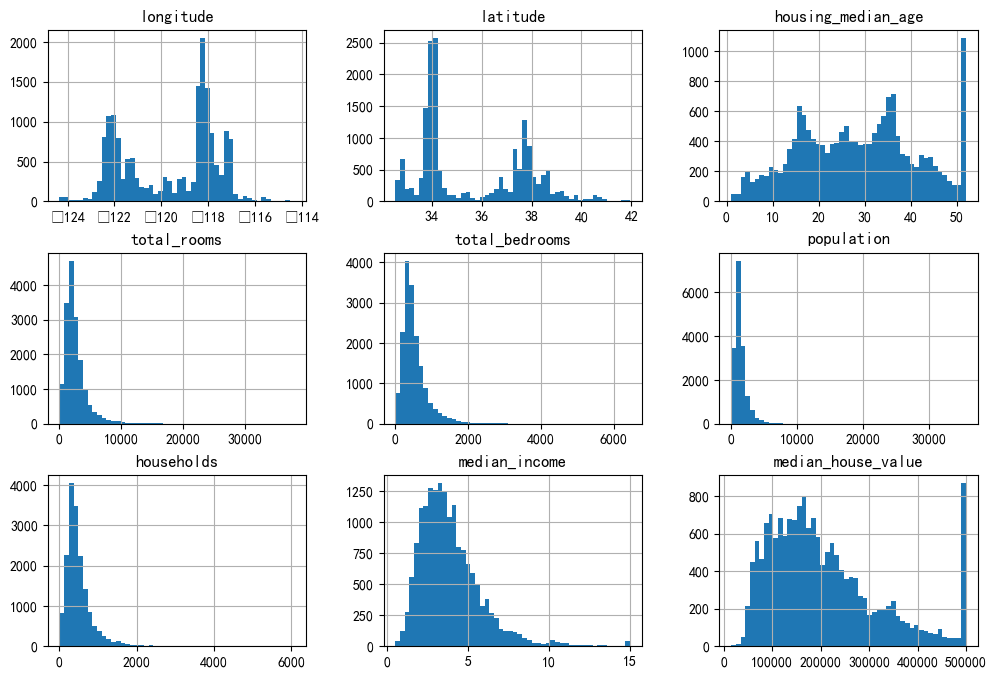

In [29]:
# 1. 读取数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# data=fetch_california_housing()
housing=pd.read_csv('./data/california_housing_train.csv')
housing.info()

housing.hist(bins=50,figsize=(12,8))

In [30]:
# 2. 划分训练集和测试集
from sklearn.model_selection import train_test_split

X=housing.iloc[:,:-1]
y=housing.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

# 对数据进行预处理
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,StandardScaler

# log_transformer = FunctionTransformer(func=np.log1p,inverse_func=np.expm1,validate=False)
# preprocessor=ColumnTransformer(transformers=[('standard',StandardScaler(),['total_rooms','total_bedrooms','population','households'])],remainder='drop')
#
# X_train=preprocessor.fit_transform(X_train)
# X_test=preprocessor.fit_transform(X_test)

In [34]:
# 3.进行模型选择和超参数优化(网格搜索)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# 取2000参数作为验证集
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=2000, random_state=42, shuffle=True)

# 定义RMSE评分函数
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# 模型配置和参数网格
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
        'params': {'ridge__alpha': [0.01, 0.1, 1, 10]}
    },
    'Lasso': {
        'model': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(max_iter=5000))]),
        'params': {'lasso__alpha': [0.001, 0.01, 0.1]}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {'max_depth': [3, 5, 7, None]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1),
        'params': {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.05], 'max_depth': [3, 5]}
    },
    'SVR': {
        'model': Pipeline([('scaler', StandardScaler()), ('svr', SVR())]),
        'params': {'svr__C': [0.1, 1, 10], 'svr__kernel': ['linear', 'rbf'],'svr__epsilon': [0.01, 0.1, 0.5]}
    }}

results = []
best_models = {}

# 对每个模型进行网格搜索
for model_name, config in models.items():
    print(f"\n=== 训练 {model_name} ===")

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=rmse_scorer,
        cv=3,
        n_jobs=-1,
        verbose=1)

    grid.fit(X_train_sub, y_train_sub)

    # 在验证集上评估
    val_pred = grid.predict(X_val)
    val_rmse = rmse_score(y_val, val_pred)

    # 记录结果
    results.append({'model': model_name,'best_params': grid.best_params_,'val_rmse': val_rmse})

    best_models[model_name] = grid.best_estimator_

    print(f"最佳参数: {grid.best_params_}")
    print(f"验证集RMSE: {val_rmse:.4f}")


=== 训练 Linear Regression ===
Fitting 3 folds for each of 1 candidates, totalling 3 fits
最佳参数: {}
验证集RMSE: 68999.6772

=== 训练 Ridge ===
Fitting 3 folds for each of 4 candidates, totalling 12 fits
最佳参数: {'ridge__alpha': 10}
验证集RMSE: 69023.7798

=== 训练 Lasso ===
Fitting 3 folds for each of 3 candidates, totalling 9 fits
最佳参数: {'lasso__alpha': 0.1}
验证集RMSE: 68999.7227

=== 训练 Decision Tree ===
Fitting 3 folds for each of 4 candidates, totalling 12 fits
最佳参数: {'max_depth': 7}
验证集RMSE: 65376.3820

=== 训练 Random Forest ===
Fitting 3 folds for each of 6 candidates, totalling 18 fits
最佳参数: {'max_depth': None, 'n_estimators': 100}
验证集RMSE: 48454.8404

=== 训练 Gradient Boosting ===
Fitting 3 folds for each of 8 candidates, totalling 24 fits
最佳参数: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
验证集RMSE: 50342.9438

=== 训练 SVR ===
Fitting 3 folds for each of 18 candidates, totalling 54 fits
最佳参数: {'svr__C': 10, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'}
验证集RMSE: 90834.3764


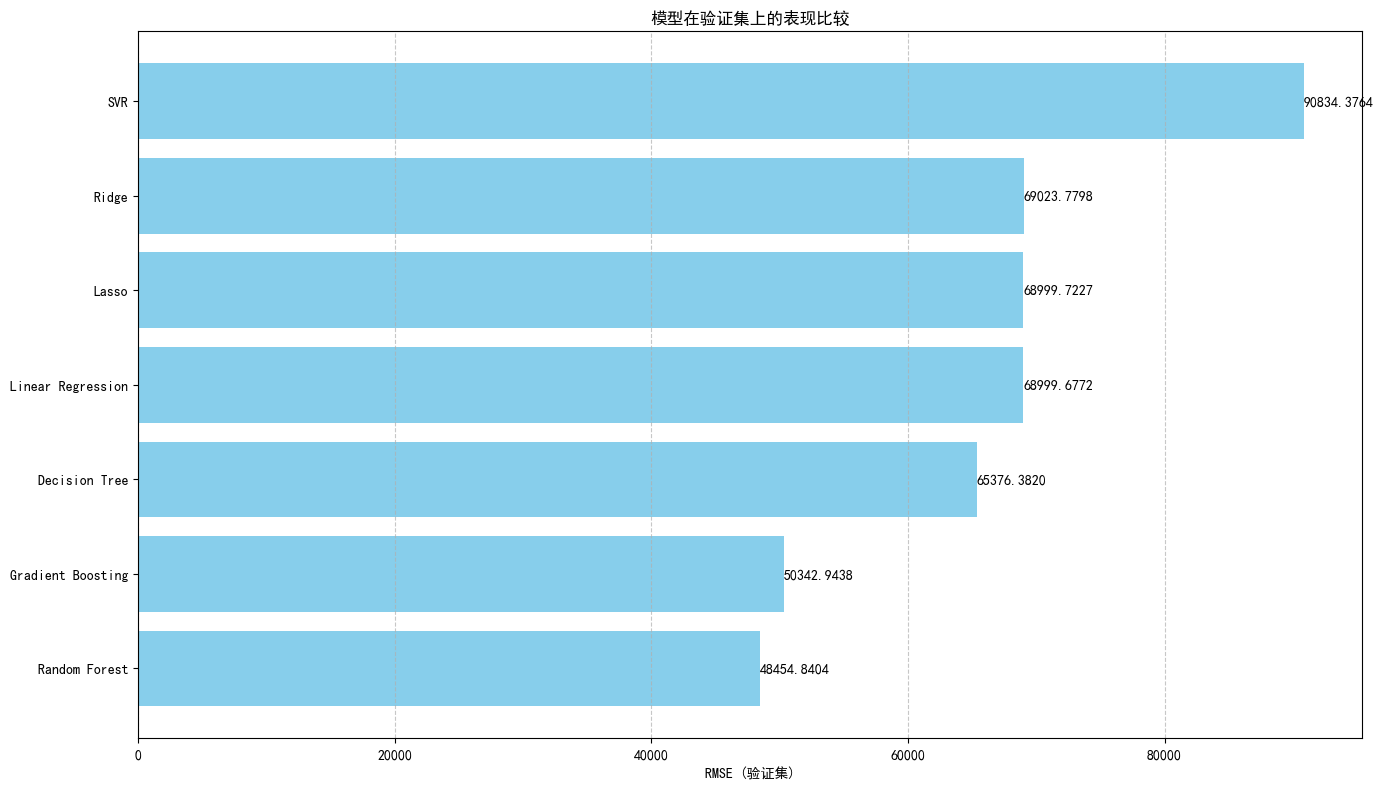


最佳模型: Random Forest
验证集RMSE: 48454.8404
最佳参数: {'max_depth': None, 'n_estimators': 100}


In [35]:
# 4. 可视化各模型在验证集的表现
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong', 'STSong']

results_df = pd.DataFrame(results).sort_values('val_rmse')

plt.figure(figsize=(14, 8))
bars = plt.barh(results_df['model'], results_df['val_rmse'], color='skyblue')
plt.xlabel('RMSE (验证集)')
plt.title('模型在验证集上的表现比较')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 在柱状图上显示RMSE值
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}',
             ha='left', va='center')

plt.tight_layout()
plt.show()

# 输出最佳模型
best_model_name = results_df.iloc[0]['model']
print(f"\n最佳模型: {best_model_name}")
print(f"验证集RMSE: {results_df.iloc[0]['val_rmse']:.4f}")
print(f"最佳参数: {results_df.iloc[0]['best_params']}")

In [36]:
best_models

{'Linear Regression': LinearRegression(),
 'Ridge': Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=10))]),
 'Lasso': Pipeline(steps=[('scaler', StandardScaler()),
                 ('lasso', Lasso(alpha=0.1, max_iter=5000))]),
 'Decision Tree': DecisionTreeRegressor(max_depth=7, random_state=42),
 'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
 'Gradient Boosting': GradientBoostingRegressor(max_depth=5, random_state=42),
 'SVR': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svr', SVR(C=10, epsilon=0.5, kernel='linear'))])}